#

In [189]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob  #Library for Text Processing
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS
import networkx as nx

In [3]:
tweets=pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/demonetization-tweets.csv",encoding = "ISO-8859-1")
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [4]:
tweets.shape

(14940, 16)

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Number of retweetcount by Source bis')

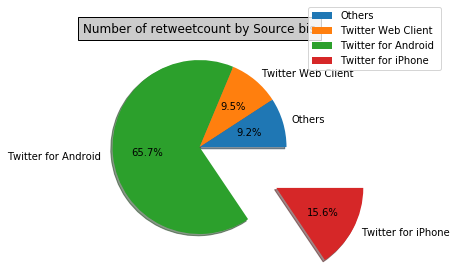

In [154]:
tweets['statusSource_new'] = ''

for i in range(len(tweets['statusSource'])):
    m = re.search('(?<=>)(.*)', tweets['statusSource'][i])
    try:
        tweets['statusSource_new'][i]=m.group(0)
    except AttributeError:
        tweets['statusSource_new'][i]=tweets['statusSource'][i]
        
#print(tweets['statusSource_new'].head())   

tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)
tweets['statusSource_new2'] = ''

for i in range(len(tweets['statusSource_new'])):
    if tweets['statusSource_new'][i] not in ['Twitter for Android ','Twitter Web Client ','Twitter for iPhone ']:
        tweets['statusSource_new2'][i] = 'Others'
    else:
        tweets['statusSource_new2'][i] = tweets['statusSource_new'][i] 
#print(tweets['statusSource_new2'])       

tweets_by_type2 = tweets.groupby(['statusSource_new2'])['retweetCount'].sum()
tweets_by_type2.rename("",inplace=True)
explode = (0, 0, 0, 1.0)
tweets_by_type2.transpose().plot(kind='pie',figsize=(6.5, 4),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of retweetcount by Source bis', bbox={'facecolor':'0.8', 'pad':5})

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
####
from nltk.stem import WordNetLemmatizer
#tweets['text_sep'] = [''.join(z).strip() for z in tweets['text_new']]
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets.text]       
####
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
print(X.shape)

(14940, 1925)


In [159]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10,init='k-means++',max_iter=200,n_init=1)

In [160]:
km.fit(X)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(10):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind], end='')
    print() 

cluster 0: loosened restrictions withdrawal steve hanke demo claims running modi atms
cluster 1: implement evanspiegel dear rich urautelaforever actually narendra pm modi india
cluster 2: ahead man ends daughter gujarat fund wedding life shortage ashu
cluster 3: nation modibharosa support narendramodi pm people huge voter su putting
cluster 4: glvmi munaf ages patel seeing roflgandhi thought lost function fund
cluster 5: kishtwar gauravcsawant incident looted terrorists lakh rs bank https gau
cluster 6: oscar obqrhlnsl drkumarvishwas goes mr https kumar retweeted dr hazare
cluster 7: youtube people money modi narendramodi like good rahulroushan survey govt
cluster 8: secy dea briefing morning dasshaktikanta tdj pib watch uo india
cluster 9: https india impact question paytm modi critical rssurjewala clearly edict


In [190]:
# def maybe_fit_tsne(file=None):
#     if file is None:
#         file = "/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/bio_matrix_2d.npy"
#     try:
#         bio_matrix_2d = np.load(file)
#         logging.warning("loading cached TSNE file")
#     except FileNotFoundError:
#         logging.warning("Fitting TSNE")
#         tsne = TSNE(n_components=2,
#                     n_jobs=-1,
#                     random_state=seed)
#         bio_matrix_2d = tsne.fit_transform(bio_matrix.todense())

#         np.save(file, bio_matrix_2d)
#     return bio_matrix_2d

In [191]:
tsne_file = "/home/dheeraj/my_projects/my_project_env/practice/sentiment_analysis/bio_matrix_2d.npy"

In [192]:
# import os
# %%time
# bio_matrix_2d = maybe_fit_tsne(tsne_file)


UsageError: Line magic function `%%time` not found.


In [193]:
# def get_plottable_df(users, bios, two_d_coords, labels):
#     """
#     Combine the necessary pieces of data to create a data structure that plays
#     nicely with the our 2d tsne chart.

#     Note: assumes that all argument data series
#     are in the same order e.g. the first user, bio, coords, and label
#     all correspond to the same user.
#     """
#     # set up color palette
#     num_labels = len(set(labels))
#     colors = sns.color_palette('hls', num_labels).as_hex()
#     color_lookup = {v:k for k,v in zip(colors, set(labels))}
#     # combine data into a single df
#     df = pd.DataFrame({'uid': users,
#                        'text': bios,
                       
#                        'x_val': two_d_coords[:,0],
#                        'y_val': two_d_coords[:,1],
#                       })
#     # convert labels to colors
#     df['color'] = list(map(lambda x: color_lookup[x], labels))
#     return df

In [194]:
# def plot_tsne(df, title='t-SNE plot'):
#     # add our DataFrame as a ColumnDataSource for Bokeh
#     plot_data = ColumnDataSource(df)
#     # configure the chart
#     tsne_plot = figure(title=title, plot_width=800, plot_height=700, tools=('pan, box_zoom, reset'))
#     # add a hover tool to display words on roll-over
#     tsne_plot.add_tools(
#         HoverTool(tooltips = """<div style="width: 400px;">(@label) @text</div>""")
#     )
#     # draw the words as circles on the plot
#     tsne_plot.circle('x_val', 'y_val',
#                      source=plot_data,
#                      color='color',
#                      line_alpha=0.2,
#                      fill_alpha=0.1,
#                      size=7,
#                      hover_line_color='black')
#     # configure visual elements of the plot
#     tsne_plot.title.text_font_size = '12pt'
#     tsne_plot.xaxis.visible = False
#     tsne_plot.yaxis.visible = False
#     tsne_plot.grid.grid_line_color = None
#     tsne_plot.outline_line_color = None
#     return tsne_plot

In [195]:
# plt.show(plot_tsne(km_plottable_bios.sample(5000),
#                't-sne projection of kmeans-clustered users ["(cluster #) bio"]'))

NameError: name 'km_plottable_bios' is not defined

In [5]:
display(tweets.text.head(10))

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @Hemant_80: Did you vote on #Demonetization...
2    RT @roshankar: Former FinSec, RBI Dy Governor,...
3    RT @ANI_news: Gurugram (Haryana): Post office ...
4    RT @satishacharya: Reddy Wedding! @mail_today ...
5    @DerekScissors1: Indias #demonetization: #Bla...
6    RT @gauravcsawant: Rs 40 lakh looted from a ba...
7    RT @Joydeep_911: Calling all Nationalists to j...
8    RT @sumitbhati2002: Many opposition leaders ar...
9    National reform now destroyed even the essence...
Name: text, dtype: object

In [6]:
print(tweets['retweetCount'])

0        331
1         66
2         12
3        338
4        120
        ... 
14935      4
14936      0
14937     30
14938      2
14939      2
Name: retweetCount, Length: 14940, dtype: int64


In [7]:
# tweets_avgwrd_hour = tweets.groupby(['hour'])['nb_words'].mean()
# tweets_avgwrd_hour.transpose().plot(kind='line',figsize=(6.5, 4))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('The Average number of words by hour', bbox={'facecolor':'0.8', 'pad':0})

In [8]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dheeraj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dheeraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
def clean(x):
    #Remove Html  
    x=BeautifulSoup(x).get_text()
    
    #Remove Non-Letters
    x=re.sub('[^a-zA-Z]',' ',x)
    
    #Convert to lower_case and split
    x=x.lower().split()
    
    #Remove stopwords
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]
    
    #join the words back into one string
    return(' '.join(words))


In [10]:
tweets['text']=tweets['text'].apply(lambda x:clean(x))

In [11]:
# tweets.head()
display(tweets.text.head(10))

0    rt rssurjewala critical question paytm informe...
1        rt hemant vote demonetization modi survey app
2    rt roshankar former finsec rbi dy governor cbd...
3    rt ani news gurugram haryana post office emplo...
4    rt satishacharya reddy wedding mail today cart...
5    derekscissors india demonetization blackmoney ...
6    rt gauravcsawant rs lakh looted bank kishtwar ...
7    rt joydeep calling nationalists join walk corr...
8    rt sumitbhati many opposition leaders narendra...
9    national reform destroyed even essence sagan i...
Name: text, dtype: object

In [12]:
words_in_tweet = [tweets.lower().split() for tweets in tweets.text]
words_in_tweet

[['rt',
  'rssurjewala',
  'critical',
  'question',
  'paytm',
  'informed',
  'demonetization',
  'edict',
  'pm',
  'clearly',
  'fishy',
  'requires',
  'full',
  'disclosure'],
 ['rt', 'hemant', 'vote', 'demonetization', 'modi', 'survey', 'app'],
 ['rt',
  'roshankar',
  'former',
  'finsec',
  'rbi',
  'dy',
  'governor',
  'cbdt',
  'chair',
  'harvard',
  'professor',
  'lambaste',
  'demonetization',
  'aam',
  'aadmi',
  'listen',
  'th'],
 ['rt',
  'ani',
  'news',
  'gurugram',
  'haryana',
  'post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'patients',
  'hospitals',
  'demonetization',
  'https',
  'co',
  'ugmxup'],
 ['rt',
  'satishacharya',
  'reddy',
  'wedding',
  'mail',
  'today',
  'cartoon',
  'demonetization',
  'reddywedding',
  'https',
  'co',
  'u',
  'glnrq',
  'f'],
 ['derekscissors',
  'india',
  'demonetization',
  'blackmoney',
  'symptom',
  'disease',
  'https',
  'co',
  'hsl',
  'ihj',
  'qe',
  'via',
  'ambazaarmag'],
 ['rt

In [13]:
import itertools
import collections

In [14]:
# all_words_no_urls = list(itertools.chain(*words_in_tweet))

# # Create counter
# counts_no_urls = collections.Counter(all_words_no_urls)

# counts_no_urls.most_common(15)

In [15]:
# clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
#                              columns=['words', 'count'])

# clean_tweets_no_urls

In [16]:
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot horizontal bar graph
# clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
#                       y='count',
#                       ax=ax,
#                       color="green")

# ax.set_title("Common Words Found in Tweets (Including All Words)")

# plt.show()

In [17]:
# words_in_tweet[0]

In [18]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['himself',
 'are',
 "didn't",
 'weren',
 'my',
 "needn't",
 'did',
 'for',
 'own',
 'isn']

In [19]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [30]:
tweets_nsw

[['rt',
  'rssurjewala',
  'critical',
  'question',
  'paytm',
  'informed',
  'demonetization',
  'edict',
  'pm',
  'clearly',
  'fishy',
  'requires',
  'full',
  'disclosure'],
 ['rt', 'hemant', 'vote', 'demonetization', 'modi', 'survey', 'app'],
 ['rt',
  'roshankar',
  'former',
  'finsec',
  'rbi',
  'dy',
  'governor',
  'cbdt',
  'chair',
  'harvard',
  'professor',
  'lambaste',
  'demonetization',
  'aam',
  'aadmi',
  'listen',
  'th'],
 ['rt',
  'ani',
  'news',
  'gurugram',
  'haryana',
  'post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'patients',
  'hospitals',
  'demonetization',
  'https',
  'co',
  'ugmxup'],
 ['rt',
  'satishacharya',
  'reddy',
  'wedding',
  'mail',
  'today',
  'cartoon',
  'demonetization',
  'reddywedding',
  'https',
  'co',
  'u',
  'glnrq',
  'f'],
 ['derekscissors',
  'india',
  'demonetization',
  'blackmoney',
  'symptom',
  'disease',
  'https',
  'co',
  'hsl',
  'ihj',
  'qe',
  'via',
  'ambazaarmag'],
 ['rt

In [21]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('demonetization', 14571),
 ('rt', 11060),
 ('https', 6524),
 ('co', 5704),
 ('india', 3293),
 ('modi', 3106),
 ('pm', 2783),
 ('narendra', 1566),
 ('rich', 1513),
 ('find', 1422),
 ('dear', 1411),
 ('implement', 1400),
 ('evanspiegel', 1389),
 ('actually', 1374),
 ('urautelaforever', 1273)]

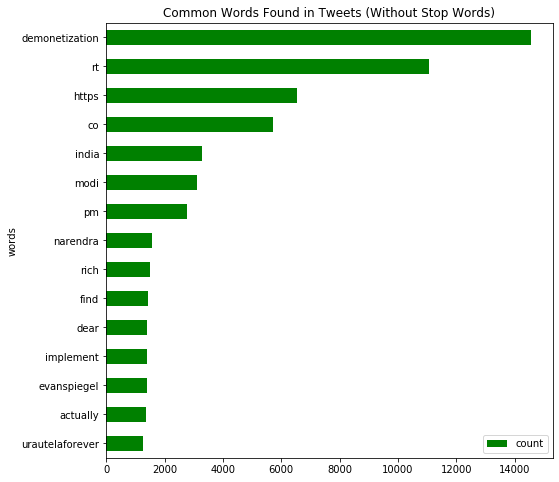

In [22]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [85]:
collection_words = ['rt', 'co', 'http', 'https', 'j', 'k']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [86]:
tweets_nsw_nc

[['rssurjewala',
  'critical',
  'question',
  'paytm',
  'informed',
  'demonetization',
  'edict',
  'pm',
  'clearly',
  'fishy',
  'requires',
  'full',
  'disclosure'],
 ['hemant', 'vote', 'demonetization', 'modi', 'survey', 'app'],
 ['roshankar',
  'former',
  'finsec',
  'rbi',
  'dy',
  'governor',
  'cbdt',
  'chair',
  'harvard',
  'professor',
  'lambaste',
  'demonetization',
  'aam',
  'aadmi',
  'listen',
  'th'],
 ['ani',
  'news',
  'gurugram',
  'haryana',
  'post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'patients',
  'hospitals',
  'demonetization',
  'ugmxup'],
 ['satishacharya',
  'reddy',
  'wedding',
  'mail',
  'today',
  'cartoon',
  'demonetization',
  'reddywedding',
  'u',
  'glnrq',
  'f'],
 ['derekscissors',
  'india',
  'demonetization',
  'blackmoney',
  'symptom',
  'disease',
  'hsl',
  'ihj',
  'qe',
  'via',
  'ambazaarmag'],
 ['gauravcsawant',
  'rs',
  'lakh',
  'looted',
  'bank',
  'kishtwar',
  'third',
  'incident',
  

In [87]:
from nltk import bigrams
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

In [88]:
terms_bigram

[[('rssurjewala', 'critical'),
  ('critical', 'question'),
  ('question', 'paytm'),
  ('paytm', 'informed'),
  ('informed', 'demonetization'),
  ('demonetization', 'edict'),
  ('edict', 'pm'),
  ('pm', 'clearly'),
  ('clearly', 'fishy'),
  ('fishy', 'requires'),
  ('requires', 'full'),
  ('full', 'disclosure')],
 [('hemant', 'vote'),
  ('vote', 'demonetization'),
  ('demonetization', 'modi'),
  ('modi', 'survey'),
  ('survey', 'app')],
 [('roshankar', 'former'),
  ('former', 'finsec'),
  ('finsec', 'rbi'),
  ('rbi', 'dy'),
  ('dy', 'governor'),
  ('governor', 'cbdt'),
  ('cbdt', 'chair'),
  ('chair', 'harvard'),
  ('harvard', 'professor'),
  ('professor', 'lambaste'),
  ('lambaste', 'demonetization'),
  ('demonetization', 'aam'),
  ('aam', 'aadmi'),
  ('aadmi', 'listen'),
  ('listen', 'th')],
 [('ani', 'news'),
  ('news', 'gurugram'),
  ('gurugram', 'haryana'),
  ('haryana', 'post'),
  ('post', 'office'),
  ('office', 'employees'),
  ('employees', 'provide'),
  ('provide', 'cash'),
  (

In [89]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('narendra', 'modi'), 1566),
 (('india', 'rich'), 1431),
 (('pm', 'narendra'), 1424),
 (('demonetization', 'find'), 1399),
 (('implement', 'demonetization'), 1398),
 (('rich', 'pm'), 1391),
 (('modi', 'implement'), 1376),
 (('evanspiegel', 'india'), 1371),
 (('dear', 'evanspiegel'), 1366),
 (('find', 'actually'), 1311),
 (('urautelaforever', 'dear'), 1273),
 (('narendramodi', 'demonetization'), 595),
 (('pm', 'narendramodi'), 590),
 (('since', 'demonetization'), 572),
 (('rs', 'lakh'), 551),
 (('demonetization', 'terrorists'), 550),
 (('lakh', 'looted'), 544),
 (('looted', 'bank'), 544),
 (('bank', 'kishtwar'), 542),
 (('kishtwar', 'third'), 542)]

In [131]:
#Top 20 most common bigrams
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(narendra, modi)",1566
1,"(india, rich)",1431
2,"(pm, narendra)",1424
3,"(demonetization, find)",1399
4,"(implement, demonetization)",1398
5,"(rich, pm)",1391
6,"(modi, implement)",1376
7,"(evanspiegel, india)",1371
8,"(dear, evanspiegel)",1366
9,"(find, actually)",1311


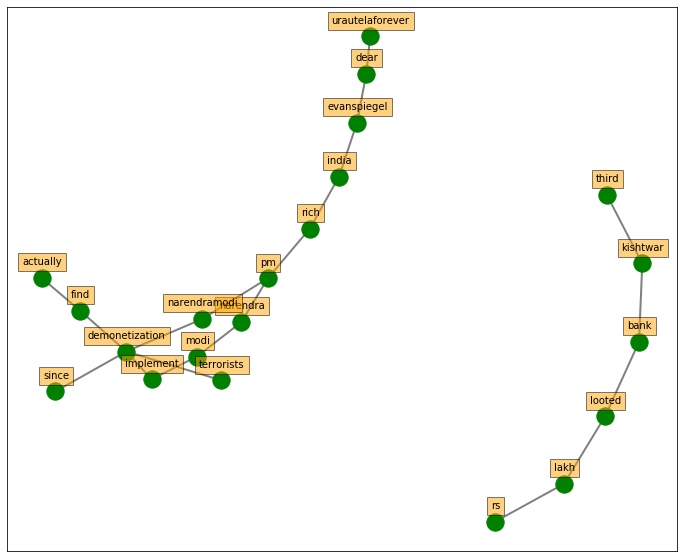

In [151]:
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 3))

fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=4)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=11,
                 fontweight='bold',
                 width=2,
                 edge_color='grey',
                 node_color='green',
#                  edge_length = 10,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.00167, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='orange', alpha=0.5),
            horizontalalignment='center', fontsize=10)
    
plt.show()

In [ ]:
TextBlob("not great").sentiment

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='Positive'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='Neutral'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='Negative'
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,rt rssurjewala critical question paytm informe...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.706,0.135,0.159,Positive
1,2,2,rt hemant vote demonetization modi survey app,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.000,0.000,Neutral
2,3,3,rt roshankar former finsec rbi dy governor cbd...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.000,0.000,Neutral
3,4,4,rt ani news gurugram haryana post office emplo...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.000,0.000,Neutral
4,5,5,rt satishacharya reddy wedding mail today cart...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.000,0.000,Neutral


In [25]:
tweets.sentiment_type.value_counts()

Positive    6771
Neutral     4233
Negative    3936
Name: sentiment_type, dtype: int64

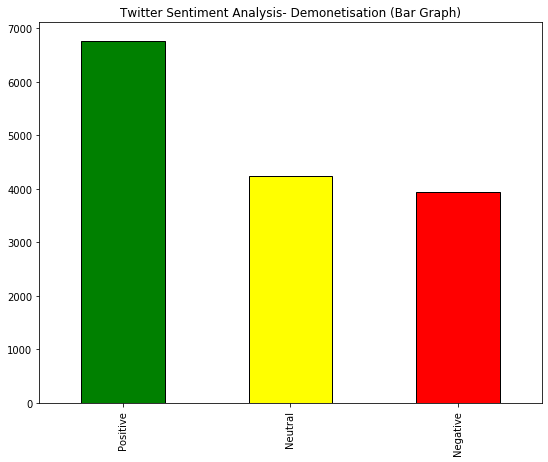

In [26]:
# fig = plt.figure()
# fig.savefig('Sentiment_bar_plot.pdf')
colors = ['green', 'yellow', 'red']
tweets.sentiment_type.value_counts().plot(kind='bar',figsize=(9, 7),edgecolor='k',title="Twitter Sentiment Analysis- Demonetisation (Bar Graph)", color=colors)
# plt.savefig('Sentiment_bar_plot.png', dpi=100)

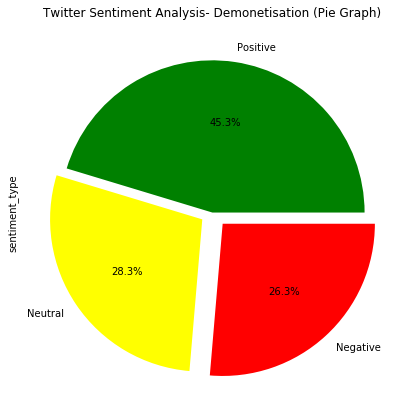

In [27]:
colors = ['green', 'yellow', 'red']
explode = (0, 0.08, 0.1)
tweets.sentiment_type.value_counts().plot(kind='pie', figsize=(9, 7), title="Twitter Sentiment Analysis- Demonetisation (Pie Graph)", colors=colors, explode=explode,autopct='%1.1f%%', shadow=False)
# plt.savefig('Sentiment_pie_plot.png', dpi=100)